In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
import pmdarima as pm

In [4]:
np.random.seed(24)
plt.style.use('fivethirtyeight')

In [5]:
co = pd.read_csv("co2.csv", parse_dates=["date"], index_col="date")
co.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [6]:
co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 727 entries, 1958-03-01 to 2018-09-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CO2_ppm  727 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


#### Visualizing the time-series

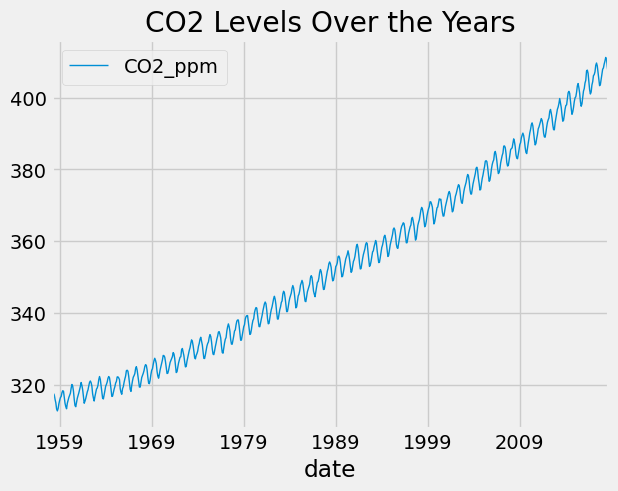

In [7]:
co.plot(title="CO2 Levels Over the Years", linewidth=1)
plt.show()

#### Seasonal Decomposition

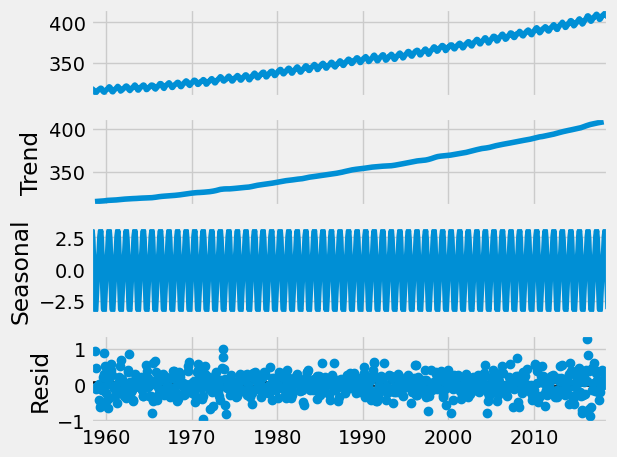

In [8]:
decom_results = seasonal_decompose(co, period=12)
decom_results.plot()
plt.show()

#### Detrending the time-series

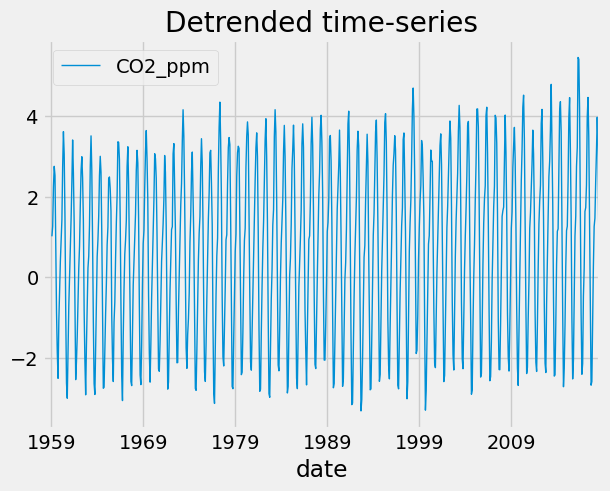

In [9]:
co1 = co - co.rolling(12).mean().dropna()
co1.plot(title="Detrended time-series", linewidth=1)
plt.show()

#### Seasonal data identification

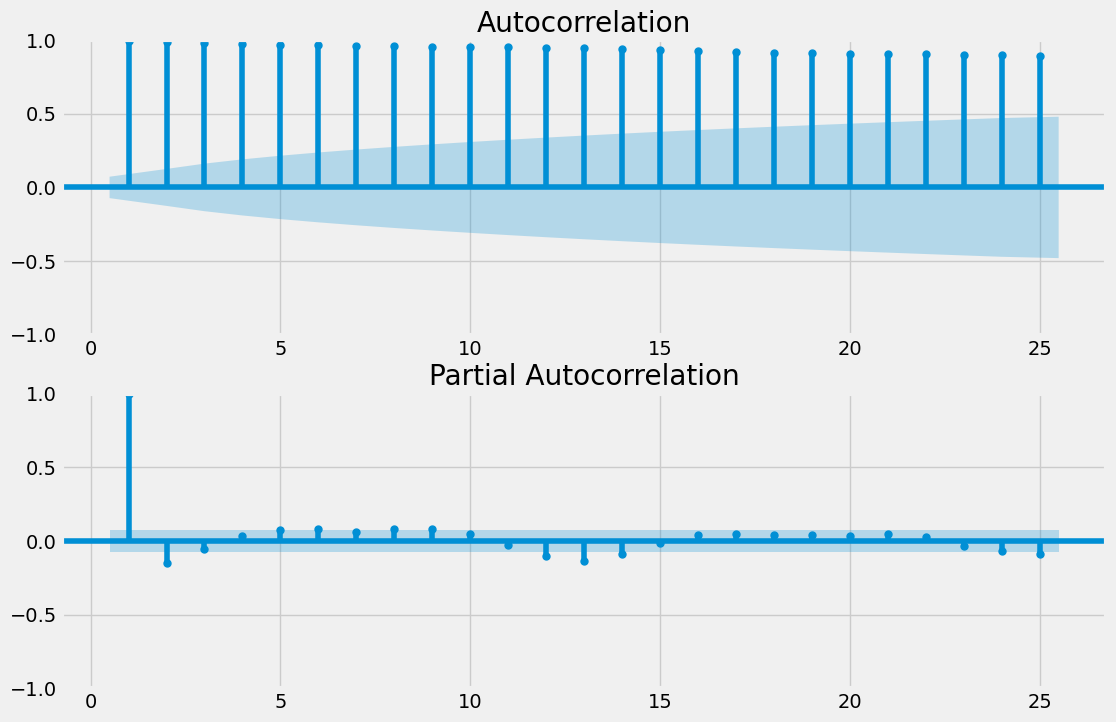

In [10]:
fig, ax = plt.subplots(2,1, figsize=(12,8))

plot_acf(co, ax=ax[0], lags=25, zero=False)
plot_pacf(co, ax=ax[1], lags=25, zero=False)
plt.show()

In [14]:
pm.auto_arima(co)

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True)